# Topic 42: Tuning Neural Networks

- 06/08/21
- onl01-dtsc-ft-022221

## Learning Objectives

- Discuss the different options available for tuning neural networks
- Discuss some rules of thumb for tuning Neural Networks

- **ACTIVITY: Use a computer vision task to walk-through hyperparameter tuning (cats vs dogs)**
    - [Zip File on Google Drive](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)

- **Learn how to use GridSearchCV with Keras neural neural networks.**

    - Learn how to examine the other parameter results from a GridSearchCV object.

    - Learn how to create your own custom scorer for sklearn (and why you'd want to)
- Learn how to set up email notifications via Python (for gridsearch results)


## Questions/Comments?
-

# Overview  - Neural Network Tuning 

## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### Dealing with Bias/Variance

- Balancing Bias/Variance:
    - High Bias models are **underfit**
    - High Variance models are **overfit**



- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is roughly laid out in order of importance/what-to-tune-first
    - [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters (For Dense layers)

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons


7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout

### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categorical cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- **can also uses custom scoring functions**

## Using Regularization

### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'
    
    

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$
- where $\lambda$ is the regularization parameter. 

- **The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.**  


<br><br>
- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

### Additional Options

#### Dropout 

#### Early Stopping

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


# Activity: Dogs vs Cats

- Build an image classification model to classify images of cats vs dogs

## Installs, Imports, & Functions

In [3]:
# !pip install -U tensorflow
from tensorflow.random import set_seed
set_seed(321)

import numpy as np
np.random.seed(321)

import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.0'

In [4]:
## Import the usual suspects (notice the mpl import)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
import os,glob,sys
# print(os.path.abspath(os.curdir))


## Loading the data

### Download and unzip data

- Download the zip file of cat vs dog images. 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
    
    
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    - **Change the `BASE_FOLDER` variable below to match the location of the unzipped folder on your local machine**

### Specify Local Folders

In [5]:
# change dataset_folder to match where you stored the files
BASE_FOLDER = "/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"
os.makedirs(BASE_FOLDER,exist_ok=True)
os.listdir(BASE_FOLDER)

['single_prediction', '.DS_Store', 'Models', 'training_set', 'test_set']

In [6]:
## Specify the names of the training folder and test folder
train_folder = BASE_FOLDER+"training_set/"
test_folder = BASE_FOLDER+"test_set/"
# val_folder = BASE_FOLDER+"val/"
print(os.listdir(train_folder))

['dogs', 'cats', '.DS_Store']


### Loading Image Data with `ImageDataGenerator`


In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

#### Using ImageDataGenerator.flow_from_directory

> Train-Test-Val Split with ImageDataGenerator: https://medium.com/@olagokeibrahim165/split-train-data-into-training-and-validation-when-using-imagedatagenerator-in-keras-ffdc88bbf6f3

In [8]:
#### LOADS DATA AS NEEDED
## Image Dataset Settings
VAL_SPLIT = 0.2 
IMG_SIZE = (64,64)
BATCH_SIZE = 32



## Create ImageDataGenerator for training data - can add augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)#,
#                                    shear_range = 0.2, zoom_range = 0.2,
#                                    horizontal_flip = True)


## Create ImageDataaGenerator for validation and test data - NO AUGMENTATION!
test_val_datagen = ImageDataGenerator(rescale = 1./255,
                                      validation_split=VAL_SPLIT)

In [9]:
####### MAKING DATASETS FROM GENERATORS #############


### Use generators flow_from_directory train_set
train_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE
#                                                       class_mode='binary'
                                             )                                                  


## Makng a Test Set and validation set from the same folder.
test_set = test_val_datagen.flow_from_directory(test_folder,
                                                     target_size=IMG_SIZE,
                                                     subset='training',
                                                     batch_size=BATCH_SIZE,
#                                                     class_mode='binary'
                                               )

val_set = test_val_datagen.flow_from_directory(test_folder,target_size=IMG_SIZE,
                                                   subset='validation',
                                                    batch_size=BATCH_SIZE,
#                                                    class_mode='binary'
                                              )

Found 8000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


### Getting Our Full X,y Data 

>- Keras' Generators are intended to save on RAM and will only load in the actual images one batch at a time. 
    - To work with our Dense neural networks, we will actually get the entire dataset loadedd in RAM by looping through the generators. 

In [10]:
## MAKE X and YS FROM GENERATORS
# Get first batch
X_train_batch1, y_train_batch1=next(train_set)
X_train_batch1.shape, y_train_batch1.shape

((32, 64, 64, 3), (32, 2))

In [11]:
## get second batch
X_train_batch2,y_train_batch2=next(train_set)
X_train_batch2.shape, y_train_batch2.shape

((32, 64, 64, 3), (32, 2))

Batch 1


array([1., 0.], dtype=float32)

Batch 2


array([1., 0.], dtype=float32)

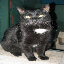

In [12]:
## conifrm batch1 and 2 are different
## Display a random 
i = 0

print('Batch 1')
display(y_train_batch1[i])
array_to_img(X_train_batch1[i])


print('Batch 2')
display(y_train_batch2[i])
array_to_img(X_train_batch2[i])

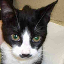

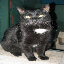

In [13]:
## Confirm the first images of batch 1 and 2 show up in correct order
X_train_combined = np.concatenate((X_train_batch1,X_train_batch2),axis=0)

display(array_to_img(X_train_combined[i]), 
        array_to_img(X_train_combined[i+32]))

In [14]:
## delete unneeded vars for memory
del X_train_batch1,X_train_batch2,X_train_combined

In [15]:
from tqdm import trange

## remake training_set
train_set = train_datagen.flow_from_directory(train_folder,
                                              target_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE)                                                  


## loop to concatenate all X and y data.
Xs,ys= [],[]

for i in trange(len(train_set)):
    X_,y_ = next(train_set)
    Xs.append(X_)
    ys.append(y_)

  0%|          | 0/250 [00:00<?, ?it/s]

Found 8000 images belonging to 2 classes.


100%|██████████| 250/250 [00:14<00:00, 17.02it/s]


In [16]:
## Concatenate all X and y data    
X_train = np.concatenate(Xs,axis=0)
y_train = np.concatenate(ys,axis=0)
X_train.shape

(8000, 64, 64, 3)

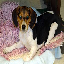

In [17]:
## Confirm we actually have our critters
array_to_img(X_train[0])

In [18]:
def get_full_xy_from_gen(train_set):
    """Loops through an image data generator dataset
    and concatenates all batches of X and y samples."""
    from tqdm import trange    
    Xs,ys= [],[]

    for i in trange(len(train_set)):
        X_,y_ = next(train_set)
        Xs.append(X_)
        ys.append(y_)
        
    X = np.concatenate(Xs,axis=0)
    y = np.concatenate(ys,axis=0)
    print(f"Final X data.shape: {X.shape}")
    print(f"Final y data.shape: {y.shape}")
    return X,y

In [19]:
## Get all test and val data

X_train,y_train = get_full_xy_from_gen(train_set)
X_test,y_test = get_full_xy_from_gen(test_set)
X_val,y_val = get_full_xy_from_gen(val_set)

  4%|▍         | 2/50 [00:00<00:03, 14.10it/s]

Final X data.shape: (8000, 64, 64, 3)
Final y data.shape: (8000, 2)


 15%|█▌        | 2/13 [00:00<00:00, 13.92it/s]

Final X data.shape: (1600, 64, 64, 3)
Final y data.shape: (1600, 2)


100%|██████████| 13/13 [00:00<00:00, 16.08it/s]

Final X data.shape: (400, 64, 64, 3)
Final y data.shape: (400, 2)


# Using Dense Networks

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras import models,layers,optimizers,regularizers,activations
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

> Reminder: dense neural networks need the images as a single row of pixels

In [21]:
## UNROW IMAGES FOR SEQUENTIAL MODEL
X_train_unrow = X_train.reshape(X_train.shape[0],-1)
X_test_unrow = X_test.reshape(X_test.shape[0],-1)
X_val_unrow = X_val.reshape(X_val.shape[0],-1)
X_train_unrow.shape

(8000, 12288)

In [22]:
## Delete non-unrowed X vars for memory
del X_train, X_test, X_val

In [23]:
## check shape of first X_train_unrow image
X_train_unrow[0].shape

(12288,)

In [24]:
## Can reshape an individual image
ex_reshaped_X = X_train_unrow[0].reshape((*IMG_SIZE,3))
ex_reshaped_X.shape

(64, 64, 3)

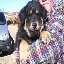

In [25]:
## Use array to img to confirm we get the original image
array_to_img(ex_reshaped_X)

In [26]:
# ## Display a random 
# i = np.random.choice(range(len(y_train)))

# print(f'Example # {i}')
# display(y_train[i])
# array_to_img(X_train_unrow[i].reshape((*IMG_SIZE,3)))

### Fitting Baseline Model

In [30]:
## get needed shape info
input_img_shape = X_train_unrow[0].shape
print(f"Single image shape: {input_img_shape}")

## get n_classes
n_classes = y_train.shape[1]
print(f"# of columns in target: {n_classes}")

Single image shape: (12288,)
# of columns in target: 2


In [31]:
def build_model():
    ## Make a Sequential Model
    model = models.Sequential()
    ## Hidden layer of 10 units with relu activation function
    model.add(layers.Dense(32,activation='relu', input_shape=input_img_shape))
#     model.add(layers.Dense(32,activation='relu'))

    ## Add final layer with n_classes # of neurons and activation='softmax'
    model.add(layers.Dense(n_classes, activation='softmax'))

    ## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy',tf.keras.metrics.Recall(name='recall')])

    ## Display model summary
    display(model.summary())
    return model

In [32]:
## Fit an initial model
model_1 = build_model()
history = model_1.fit(X_train_unrow,y_train, epochs=10,
                      validation_data=(X_val_unrow,y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                393248    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 393,314
Trainable params: 393,314
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.8937 - accuracy: 0.5016 - recall: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5011 - recall: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4908 - recall: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4939 - recall: 0.4939 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5015 - recall: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall: 0.5000
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4967 

In [ ]:
# ### ORIGINAL MEGA-FUNCTION
# def evaluate_network(model, X_test,y_test,history=None,
#                      X_train = None, y_train = None,
#                      cmap='Greens', normalize='true',
#                      classes=None,cm_figsize=(8,8), 
#                      metrics_list=['acc','loss']):
#     """Evaluates a scikit-learn binary classification model.

#     Args:
#         model (classifier): a fit keras classification model.
#         X_test (tensor/array): X data
#         y_test (Tensor/Array): y data
#         history (History object): model history from .fit
#         cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
#         normalize (str, optional): normalize argument for plot_confusion_matrix. 
#                                     Defaults to 'true'.
#         classes (list, optional): List of class names for display. Defaults to None.
#         figsize (tuple, optional): figure size Defaults to (8,4).
        
#         X_train (Frame or Array, optional): If provided, compare model.score 
#                                 for train and test. Defaults to None.
#         y_train (Series or Array, optional): If provided, compare model.score 
#                                 for train and test. Defaults to None.
#     """
    
#     header =  '==='*24
#     ## First, Plot History, if provided.
#     if history is not None:
#         print(header,'\t[i] MODEL HISTORY',header,sep='\n')

#         ## Make a dataframe out of history
#         res_df = pd.DataFrame(history.history)#.plot()

#         ## Plot Losses
#         plot_kws = dict(marker='o',ls=':')
        
#         ## Plot all metrics
#         metrics_list = model.metrics_names
#         for metric in metrics_list:
#             ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
#             ax.set(xlabel='Epoch',ylabel=metric,title=metric)
#             ax.grid()
#             ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
#             plt.show()
           
        
#     ## Evaluate Network for loss/acc scores
#     try:
#         print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
#         if X_train is not None:
#             train_loss, train_acc  = model.evaluate(X_train,y_train)#score()
     
#         ## Get Test Accuracy
#         test_loss,test_acc = model.evaluate(X_test,y_test)
        
#         if X_train is not None:
#             print(f"\tTraining Accuracy: {train_acc:.3f}")
#         print(f"\tTest Accuracy: {test_acc:.3f}")
#         print()
        
#     except Exception as e:
#         print("Error evaluating for accuracy:")
#         print(e)
        
        

    
#      ## Evaluate training data with sklearn
#     if X_train is not None:
        
#         ## Print report header, get preds, get class report, and conf matrix
#         print(header,"\t[i] CLASSIFICATION REPORT - TRAINING DATA",
#               header,sep='\n')
#         y_hat_train = model.predict(X_train)
#         y_train_class =y_train.argmax(axis=1)
#         y_hat_train_class = y_hat_train.argmax(axis=1)
#         print(metrics.classification_report(y_train_class,y_hat_train_class))
#         print()
#         cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
#                                       normalize='true')

#         ## Plot the confusion Matrix
#         fig,ax = plt.subplots(figsize=cm_figsize)
#         sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
#         ax.set(ylabel='True Class',xlabel='Predicted Class',
#                title='Confusion Matrix - Training Data')    
#         plt.show()
        
#         print('\n'*2)
        
#     ## Test Data - Print report header, get preds, get class report, and conf matrix
#     y_test_class =y_test.argmax(axis=1)
#     y_hat_test = model.predict(X_test)
#     y_hat_test_class = y_hat_test.argmax(axis=1)
    
#     print(header,"\t[i] CLASSIFICATION REPORT -  TEST DATA",header,sep='\n')
#     print(metrics.classification_report(y_test_class,y_hat_test_class))

#      ## Get the confusion matrix 
#     print()
#     cm = metrics.confusion_matrix(y_test_class, y_hat_test_class,normalize='true')
#     ## Plot the confusion Matrix
#     fig,ax = plt.subplots(figsize=cm_figsize)
#     sns.heatmap(cm, cmap='Greens',annot=True,square=True,ax=ax)
#     ax.set(ylabel='True Class',xlabel='Predicted Class',
#            title='Confusion Matrix - Test Data') 
#     plt.show()

In [56]:
### BREAKING OUR BIG FUNCTION UP INTO HELPER FUNCTIONS
def plot_history(history,model,figsize=(8,4)):
    """Takes a keras history and model and plots 
    all metrics in separate plots for each metric"""
#     print(header,'\t[i] MODEL HISTORY',header,sep='\n')

    ## Make a dataframe out of history
    res_df = pd.DataFrame(history.history)#.plot()

    ## Plot Losses
    plot_kws = dict(marker='o',ls=':',lw=2,figsize=figsize)

    ## Plot all metrics
    metrics_list = model.metrics_names

    for metric in metrics_list:
        ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
        ax.set(xlabel='Epoch',ylabel=metric,title=metric)
        ax.grid()
        ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        plt.show()

        
def evaluate_scores(model,X_train,y_train,label='Training',verbose=0):
    """Evaluates a keras model and prints the scores using the provided label."""
    train_scores  = model.evaluate(X_train,y_train,verbose=verbose)#score()
    for i,metric in enumerate(model.metrics_names):
        print(f"\t{label} {metric}: {train_scores[i]:.3f}")
        
    
def classification_report_cm(model, X_train,y_train,label='TRAINING DATA',
                            cm_figsize=(6,6),normalize='true',cmap='Greens'):
    """Gets predictions from a Keras neural network and get 
    classification report and confusion matrix."""
    ## Print report header, get preds, get class report, and conf matrix
    header =  '==='*24
    print(header,f"\t[i] CLASSIFICATION REPORT - {label}",header,sep='\n')
    print()
    
    ## Get predictions
    y_hat_train = model.predict(X_train)
    
    ## convert to 1D targets
    y_train_class =y_train.argmax(axis=1)
    y_hat_train_class = y_hat_train.argmax(axis=1)
    
    
    ## Get classification report 
    print(metrics.classification_report(y_train_class,y_hat_train_class))
    print()
    
    
    ## Plot the confusion Matrix
    cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                  normalize=normalize)
    
    fig,ax = plt.subplots(figsize=cm_figsize)
    sns.heatmap(cm, cmap=cmap, annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Training Data')    
    plt.show()

    
    
def evaluate_network(model, X_test, y_test, history=None, 
                        X_train = None, y_train = None,
                        history_figsize = (8,4), cm_figsize=(8,8),
                        cmap='Greens', normalize='true',
                        classes=None, ):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model (classifier): a fit keras classification model.
        X_test (tensor/array): X data
        y_test (tensor/array): y data
        history (History object): model history from .fit
        X_train (tensor/array): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
                                
        history_figsize (tuple): figsize for each metric's history plot.
        cm_figsize (tuple): figsize for confusion matrix plot
      
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.  
        classes (list, optional): List of class names for display. Defaults to None.
    """
    
    header =  '==='*24
    
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')
        plot_history(history,model,figsize=history_figsize)
        
    ## Evaluate Network for loss/acc scores
    print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
    print()
    
    if X_train is not None:
        try:
            evaluate_scores(model,X_train,y_train,label='Training')
            print()

        except Exception as e:
            print("Error evaluating for accuracy for training data:")
            print(e)
        
#     finally:
    ## Evaluate test data
    evaluate_scores(model,X_test,y_test,label='Test')
    print("\n")

    
    ## Evaluate training and test data with sklearn
    if X_train is not None:
        classification_report_cm(model, X_train, y_train, cmap=cmap,
                                 normalize=normalize,
                                 label='TRAINING DATA',cm_figsize=cm_figsize)       
        print('\n'*2)
    classification_report_cm(model,X_test,y_test, cmap=cmap,
                             normalize=normalize,
                             label='TEST DATA',cm_figsize=cm_figsize)
    

	[i] MODEL HISTORY


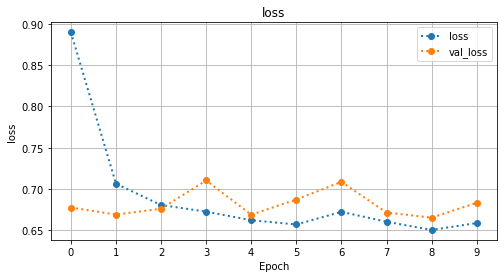

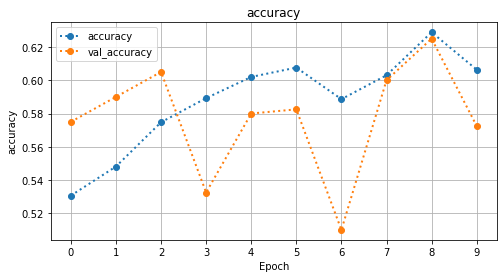

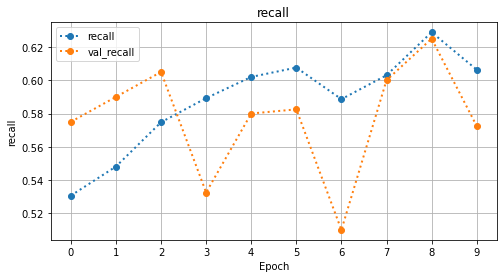

	[i] EVALUATING MODEL

	Training loss: 0.693
	Training accuracy: 0.500
	Training recall: 0.500

	Test loss: 0.693
	Test accuracy: 0.500
	Test recall: 0.500


	[i] CLASSIFICATION REPORT - TRAINING DATA



/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4000
           1       0.50      1.00      0.67      4000

    accuracy                           0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000




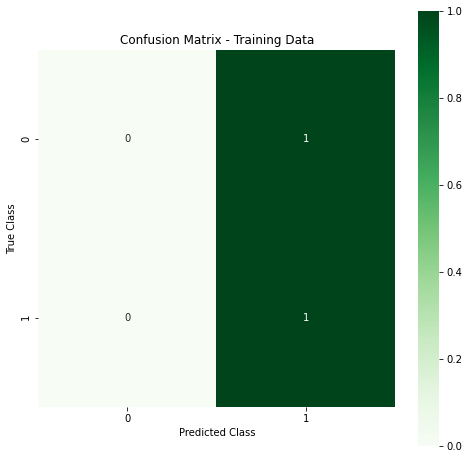




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       800
           1       0.50      1.00      0.67       800

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600




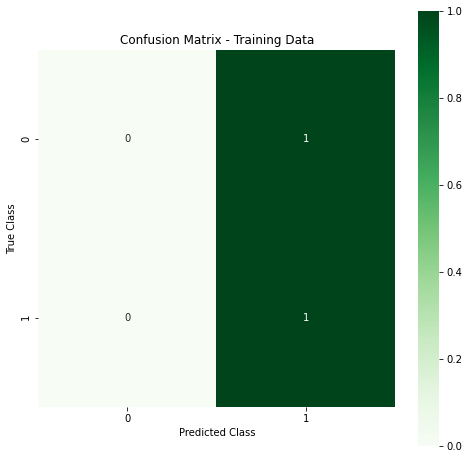

In [57]:
evaluate_network(model_1, X_test_unrow,y_test,history=history,
                 X_train = X_train_unrow, y_train = y_train )

## Activity: Ok...so now what??

> Using the rules of thumb and your own knowledge/research, attempt several methods to improve the results of the model. 

#### Some Options
- Increase # of units in hidden layer
- Add an additional Dense layer

### Model 2.x

In [58]:
def build_model2():
    ## Make a Sequential Model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_img_shape))
    model.add(layers.Dense(32,activation='relu'))

    ## Add final layer with n_classes # of neurons and activation='softmax'
    model.add(layers.Dense(n_classes, activation='softmax'))

    ## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy',tf.keras.metrics.Recall(name='recall')])

    ## Display model summary
    display(model.summary())
    return model

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                786496    
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 66        
Total params: 788,642
Trainable params: 788,642
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.9233 - accuracy: 0.5190 - recall: 0.5190 - val_loss: 0.7238 - val_accuracy: 0.5575 - val_recall: 0.5575
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.7110 - accuracy: 0.5682 - recall: 0.5682 - val_loss: 0.7236 - val_accuracy: 0.5250 - val_recall: 0.5250
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5694 - recall: 0.5694 - val_loss: 0.6697 - val_accuracy: 0.6150 - val_recall: 0.6150
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6632 - accuracy: 0.6011 - recall: 0.6011 - val_loss: 0.6915 - val_accuracy: 0.5625 - val_recall: 0.5625
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6744 - accuracy: 0.5806 - recall: 0.5806 - val_loss: 0.6793 - val_accuracy: 0.5675 - val_recall: 0.5675
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6663 - accuracy: 0.5929 

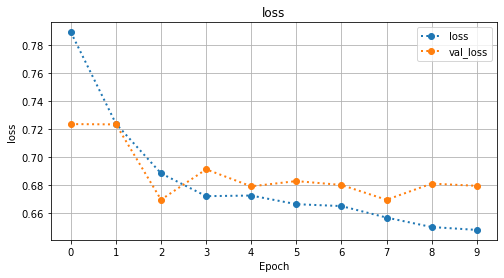

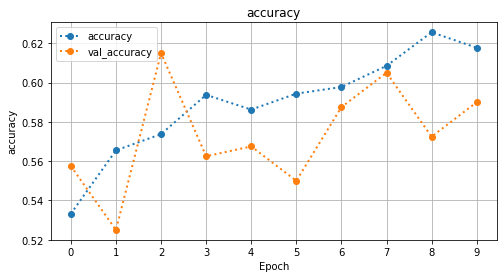

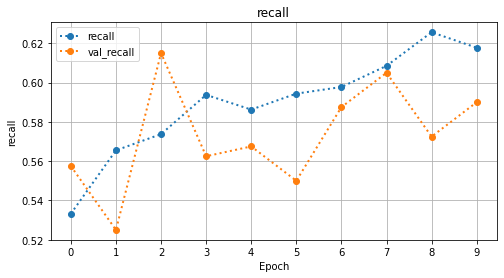

	[i] EVALUATING MODEL

	Test loss: 0.653
	Test accuracy: 0.619
	Test recall: 0.619


	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.68      0.44      0.54       800
           1       0.59      0.80      0.68       800

    accuracy                           0.62      1600
   macro avg       0.64      0.62      0.61      1600
weighted avg       0.64      0.62      0.61      1600




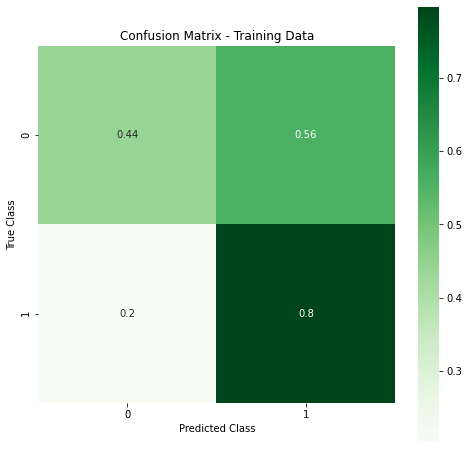

In [70]:
## Fit an initial model
model_2 = build_model2()
history = model_2.fit(X_train_unrow, y_train, epochs=10,
                      validation_data=(X_val_unrow,y_val))
evaluate_network(model_2, X_test_unrow,y_test,history=history,
#                  X_train = X_train_unrow, y_train = y_train 
                )

> Try increasing the total # of epochs 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                786496    
_________________________________________________________________
dense_49 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 66        
Total params: 788,642
Trainable params: 788,642
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
250/250 [==============================] - 1s 4ms/step - loss: 0.9632 - accuracy: 0.5201 - recall: 0.5201 - val_loss: 0.6877 - val_accuracy: 0.5675 - val_recall: 0.5675
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.7378 - accuracy: 0.5619 - recall: 0.5619 - val_loss: 0.6779 - val_accuracy: 0.5650 - val_recall: 0.5650
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6854 - accuracy: 0.5796 - recall: 0.5796 - val_loss: 0.6850 - val_accuracy: 0.5675 - val_recall: 0.5675
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.5930 - recall: 0.5930 - val_loss: 0.7007 - val_accuracy: 0.5425 - val_recall: 0.5425
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.6659 - accuracy: 0.5956 - recall: 0.5956 - val_loss: 0.6769 - val_accuracy: 0.5725 - val_recall: 0.5725
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6605 - accuracy: 0.6037 

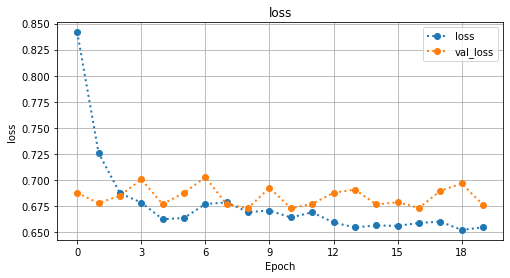

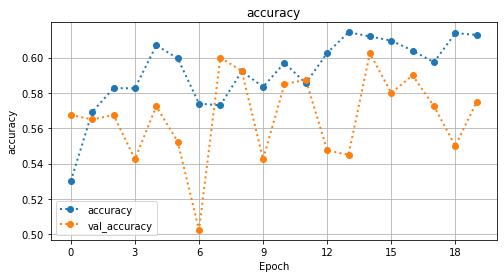

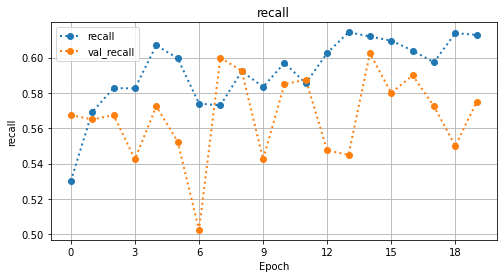

	[i] EVALUATING MODEL

	Test loss: 0.674
	Test accuracy: 0.584
	Test recall: 0.584


	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.64      0.38      0.48       800
           1       0.56      0.79      0.65       800

    accuracy                           0.58      1600
   macro avg       0.60      0.58      0.57      1600
weighted avg       0.60      0.58      0.57      1600




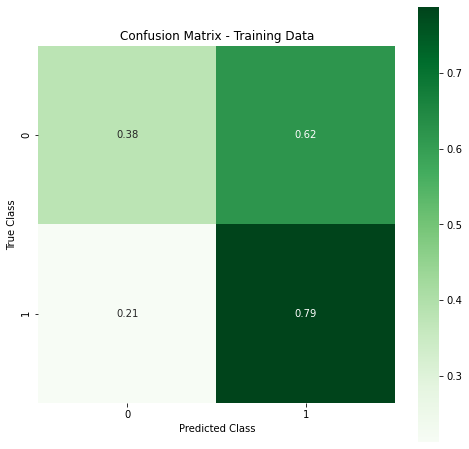

In [73]:

model = build_model2()
history = model.fit(X_train_unrow, y_train, epochs=20,
                      validation_data=(X_val_unrow,y_val))
evaluate_network(model, X_test_unrow,y_test,history=history)

### Model 3.x

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 64)                786496    
_________________________________________________________________
dense_125 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_126 (Dense)            (None, 2)                 66        
Total params: 788,642
Trainable params: 788,642
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.8981 - accuracy: 0.5165 - recall: 0.5165 - val_loss: 0.7152 - val_accuracy: 0.5475 - val_recall: 0.5475
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6862 - accuracy: 0.5816 - recall: 0.5816 - val_loss: 0.7148 - val_accuracy: 0.5350 - val_recall: 0.5350
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6677 - accuracy: 0.5999 - recall: 0.5999 - val_loss: 0.6771 - val_accuracy: 0.5800 - val_recall: 0.5800
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6558 - accuracy: 0.6054 - recall: 0.6054 - val_loss: 0.6945 - val_accuracy: 0.5500 - val_recall: 0.5500
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6551 - accuracy: 0.6105 - recall: 0.6105 - val_loss: 0.6791 - val_accuracy: 0.6025 - val_recall: 0.6025
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6371 - accuracy: 0.6338 

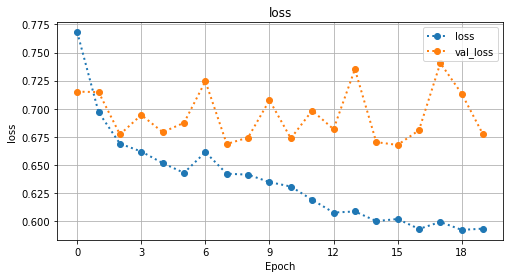

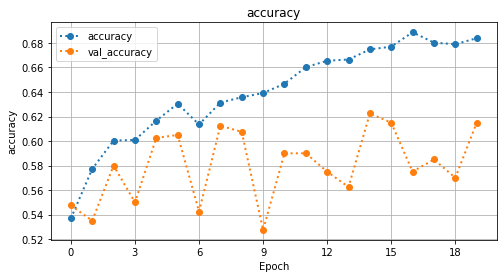

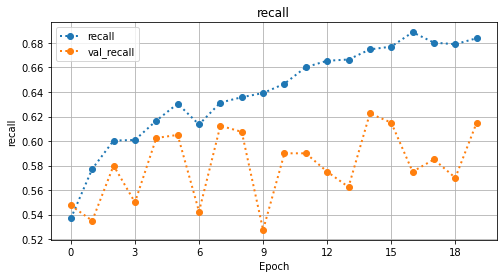

	[i] EVALUATING MODEL

	Test loss: 0.639
	Test accuracy: 0.642
	Test recall: 0.642


	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       800
           1       0.64      0.66      0.65       800

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600




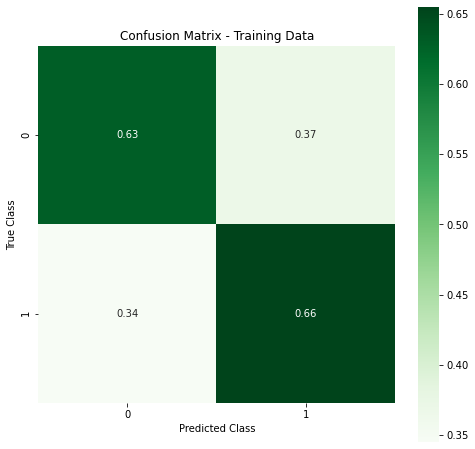

In [107]:
def build_model3():
    ## Make a Sequential Model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_img_shape))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Dense(32,activation='relu'))
#     model.add(layers.Dense(32,activation='tanh'))


    ## Add final layer with n_classes # of neurons and activation='softmax'
    model.add(layers.Dense(n_classes, activation='softmax'))

    ## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy',tf.keras.metrics.Recall(name='recall')
                          ])

    ## Display model summary
    display(model.summary())
    return model

model = build_model3()
history = model.fit(X_train_unrow, y_train, epochs=20,
                      validation_data=(X_val_unrow,y_val))
evaluate_network(model, X_test_unrow,y_test,history=history,
#                  X_train = X_train_unrow, y_train = y_train 
                )

## Adding Callbacks

### Keras Callbacks



- [Official Callback documentation](https://keras.io/callbacks/)
- CallBacks You'll Definitely Want to Use
 - `tensorflow.keras.callbacks.EarlyStopping`[ALWAYS!]
  - `tensorflow.keras.callbacks.ModelCheckpoint` [if on Colab]

- Callbacks worth further exploration
 - `keras.callbacks.callbacks.LearningRateScheduler`
 - `keras.callbacks`

In [75]:
## import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [79]:
## Make folder for models
model_folder = './models/'
os.makedirs(model_folder,exist_ok=True)
os.listdir(model_folder)

[]

In [108]:
## make checkpoints 
early_stop = EarlyStopping(monitor='val_accuracy',patience=5,verbose=1,
                          restore_best_weights=False)

checkpoint = ModelCheckpoint(model_folder,verbose=0,save_best_only=True)

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 128)               1572992   
_________________________________________________________________
dense_128 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_129 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_130 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_131 (Dense)            (None, 2)                 34        
Total params: 1,583,890
Trainable params: 1,583,890
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
250/250 [==============================] - 4s 14ms/step - loss: 0.9658 - accuracy: 0.5117 - recall: 0.5117 - val_loss: 0.6937 - val_accuracy: 0.4975 - val_recall: 0.4975
INFO:tensorflow:Assets written to: ./models/assets
Epoch 2/20
250/250 [==============================] - 3s 13ms/step - loss: 0.7019 - accuracy: 0.5069 - recall: 0.5069 - val_loss: 0.6885 - val_accuracy: 0.5475 - val_recall: 0.5475
INFO:tensorflow:Assets written to: ./models/assets
Epoch 3/20
250/250 [==============================] - 3s 12ms/step - loss: 0.6860 - accuracy: 0.5569 - recall: 0.5569 - val_loss: 0.6851 - val_accuracy: 0.5350 - val_recall: 0.5350
INFO:tensorflow:Assets written to: ./models/assets
Epoch 4/20
250/250 [==============================] - 3s 12ms/step - loss: 0.6806 - accuracy: 0.5696 - recall: 0.5696 - val_loss: 0.6805 - val_accuracy: 0.5875 - val_recall: 0.5875
INFO:tensorflow:Assets written to: ./models/assets
Epoch 5/20
250/250 [==============================] - 3s 11ms/step - los

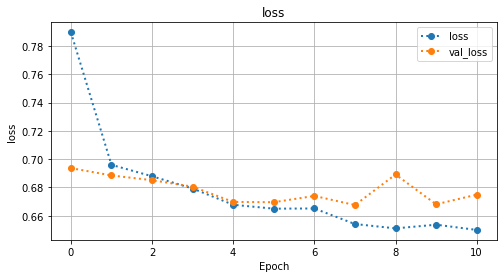

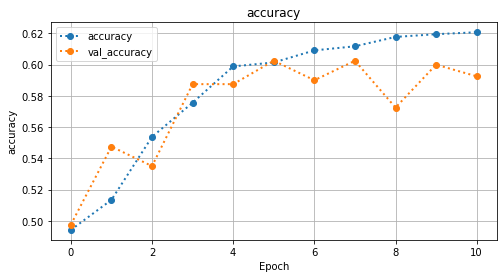

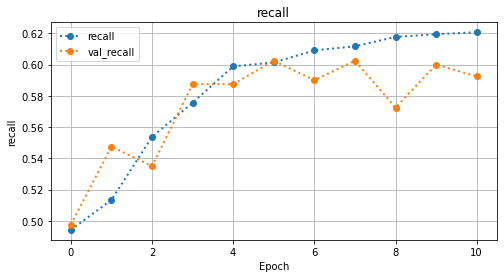

	[i] EVALUATING MODEL

	Test loss: 0.664
	Test accuracy: 0.603
	Test recall: 0.603


	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.58      0.74      0.65       800
           1       0.64      0.47      0.54       800

    accuracy                           0.60      1600
   macro avg       0.61      0.60      0.60      1600
weighted avg       0.61      0.60      0.60      1600




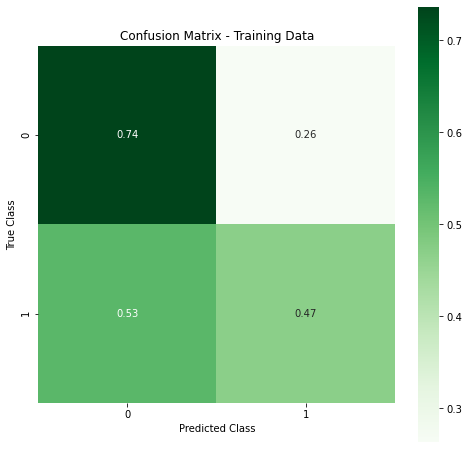

In [109]:
def build_model2():
    ## Make a Sequential Model
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=input_img_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(16,activation='relu'))

    ## Add final layer with n_classes # of neurons and activation='softmax'
    model.add(layers.Dense(n_classes, activation='softmax'))

    ## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

    model.compile(optimizer='rmsprop',#'adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy',tf.keras.metrics.Recall(name='recall')])

    ## Display model summary
    display(model.summary())
    return model

model = build_model2()
history = model.fit(X_train_unrow, y_train, epochs=20,
                    callbacks=[early_stop,checkpoint],
                      validation_data=(X_val_unrow,y_val))
evaluate_network(model, X_test_unrow,y_test,history=history)

# Gridsearching with Keras & Scikit-Learn

## HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    
<!-- 
```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```     -->

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

In [110]:

def build_model_grid(optimizer='rmsprop'):
    ## Make a Sequential Model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_img_shape))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))

#     model.add(layers.Dense(16,activation='relu'))

    ## Add final layer with n_classes # of neurons and activation='softmax'
    model.add(layers.Dense(n_classes, activation='softmax'))

    ## Compile with optimer as adam, loss as categorical_crossentropy, and accuracy as metric

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy',tf.keras.metrics.Recall(name='recall')])

    ## Display model summary
    display(model.summary())
    return model

In [117]:
model = build_model_grid(optimizer='rmsprop')
history = model.fit(X_train_unrow, y_train, epochs=20,
                    callbacks=[early_stop,checkpoint],
                      validation_data=(X_val_unrow,y_val))

# evaluate_network(model, X_test_unrow,y_test,history=history)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 64)                786496    
_________________________________________________________________
dense_150 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_151 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_152 (Dense)            (None, 2)                 34        
Total params: 789,138
Trainable params: 789,138
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
250/250 [==============================] - 2s 7ms/step - loss: 0.7941 - accuracy: 0.5046 - recall: 0.5046 - val_loss: 0.6969 - val_accuracy: 0.5325 - val_recall: 0.5325
Epoch 2/20
250/250 [==============================] - 1s 5ms/step - loss: 0.6953 - accuracy: 0.5334 - recall: 0.5334 - val_loss: 0.7053 - val_accuracy: 0.5425 - val_recall: 0.5425
Epoch 3/20
250/250 [==============================] - 1s 5ms/step - loss: 0.6742 - accuracy: 0.5833 - recall: 0.5833 - val_loss: 0.6812 - val_accuracy: 0.5800 - val_recall: 0.5800
Epoch 4/20
250/250 [==============================] - 1s 6ms/step - loss: 0.6714 - accuracy: 0.5894 - recall: 0.5894 - val_loss: 0.7384 - val_accuracy: 0.5025 - val_recall: 0.5025
Epoch 5/20
250/250 [==============================] - 1s 6ms/step - loss: 0.6735 - accuracy: 0.5840 - recall: 0.5840 - val_loss: 0.6941 - val_accuracy: 0.5900 - val_recall: 0.5900
Epoch 6/20
250/250 [==============================] - 1s 6ms/step - loss: 0.6685 - accuracy: 0.6029 

In [118]:
## making an sklearn compatible scoring function        
def evaluate_model(y_true, y_pred,history=None):
    """Evaluates neural network using sklearn metrics"""
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
#     try:    
    if history is not None:
        plot_keras_history(history)
#     except:
#         pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")

        
        

# APPENDIX

In [67]:
raise Exception('old code below!')

Exception: old code below!

In [ ]:
def make_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(make_model)
model

In [ ]:
## Fit baseline model
timer = Timer()

timer.start()
history = model.fit(X_train_img, y_train, epochs=100, batch_size=64, 
                      validation_data=(X_val_img, y_val))
timer.stop()

In [ ]:
history

In [ ]:
y_hat_test = model.predict(X_test_img)

evaluate_model(y_test,y_hat_test,history)

In [ ]:
def make_fit_evaluate_model(build_fn, fit_params = dict(epochs=100,
                                                        batch_size=64)):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                          validation_data=(X_val_img, y_val))
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

In [ ]:
fit_model,model_preds = make_fit_evaluate_model(make_model)

## APPENDIX/HOW-TOs:

## How to Make a Custom Scoring Function

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```